###  **Loading and Analysing Bitcoin Data**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

data = pd.read_csv('/content/drive/MyDrive/Data/Btc.csv')

In [ ]:
data.head()

,money_start,money_goal,period,btc
0,8000,17000,1,26.67
1,6000,10000,1,26.67
2,7000,9000,1,26.67
3,2000,5000,1,26.67
4,9000,11000,1,26.67


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   money_start  500 non-null    int64  
 1   money_goal   500 non-null    int64  
 2   period       500 non-null    int64  
 3   btc          500 non-null    float64
dtypes: float64(1), int64(3)
memory usage: 15.8 KB


In [ ]:
data['period'] = data['period'].astype(int) ## Converting data type of period to int

### **Feature Engineering**

Including the revelant columns calculated from the existing ones

In [ ]:
import numpy as np

lst1 = []
for j in range(0,len(data)):
    period = data['period'][j]+1

    a = data['money_start'][j]*((1+data['btc'][j]/100)**period)
    lst1 = np.append(lst1,a)

In [ ]:
data['term1'] = lst1

In [ ]:
import numpy as np

lst = []
for j in range(0,len(data)):
    period = data['period'][j]+1

    a = sum((1+ data['btc'][j]/100)**(period-i) for i in range(1,period))
    lst = np.append(lst,a)



In [ ]:
data['term2'] = lst

In [ ]:
data.head()

,money_start,money_goal,period,btc,term1,term2
0,8000,17000,1,26.67,12836.23112,1.2667
1,6000,10000,1,26.67,9627.17334,1.2667
2,7000,9000,1,26.67,11231.70223,1.2667
3,2000,5000,1,26.67,3209.05778,1.2667
4,9000,11000,1,26.67,14440.76001,1.2667


In [ ]:
lst2 = []

for j in range(0,len(data)):
    increment = (data['money_goal'][j] - data['term1'][j])/data['term2'][j]

    lst2 = np.append(lst2, increment)


In [ ]:
data['increment'] = lst2

In [ ]:
data.head()

,money_start,money_goal,period,btc,term1,term2,increment
0,8000,17000,1,26.67,12836.23112,1.2667,3287.099455
1,6000,10000,1,26.67,9627.17334,1.2667,294.329091
2,7000,9000,1,26.67,11231.70223,1.2667,-1761.823818
3,2000,5000,1,26.67,3209.05778,1.2667,1413.864546
4,9000,11000,1,26.67,14440.76001,1.2667,-2716.318000


### **Train-Test-Split**  

In [ ]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [ ]:
data = data.sample(frac=1)

In [ ]:
### Features and Target column

features = data.drop('increment', axis=1)
target = data['increment']

In [ ]:
### Train Test Split

X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(features, target, test_size=0.3)

X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

In [ ]:
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(350, 6) (75, 6) (75, 6) (350,) (75,) (75,)


In [ ]:
### Standardization

#scaler = StandardScaler()

#train_scaled = pd.DataFrame(
      #scaler.fit_transform(X_train),
      #columns=X_train.columns)

#test_scaled = pd.DataFrame(
      #scaler.transform(X_test),
      #columns=X_test.columns)

#train_val_scaled = pd.DataFrame(
      #scaler.fit_transform(X_val),
      #columns=X_val.columns)

### **Model Building**

In [ ]:
### Neural Networks

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(6,), kernel_initializer='normal'),
    tf.keras.layers.Dense(64, activation='relu', kernel_initializer='normal'),
    tf.keras.layers.Dense(1, activation='linear',kernel_initializer='normal'),
])

Here we changed the parameters like no of neurons to 32 as with 64 the validation loss was increasing after certain epochs

In [ ]:
#from tensorflow.keras.losses import MeanSquaredLogarithmicError

#msle = MeanSquaredLogarithmicError()

model.compile(optimizer='adam',
              loss= 'mae',
             metrics = ['mae'])

Also we changed the number of epochs to 300 from 500, as higher no of epochs was having impact on the validation loss

In [ ]:
hist = model.fit(X_train.values, Y_train.values,
          batch_size=32, epochs=300,
          validation_data=(X_val.values, Y_val.values))

Epoch 1/300
11/11 [==============================] - 1s 33ms/step - loss: 10041.7744 - mae: 10041.7744 - val_loss: 11415.5977 - val_mae: 11415.5967
Epoch 2/300
11/11 [==============================] - 0s 6ms/step - loss: 9412.9297 - mae: 9412.9297 - val_loss: 11946.1279 - val_mae: 11946.1279
Epoch 3/300
11/11 [==============================] - 0s 9ms/step - loss: 9821.1338 - mae: 9821.1338 - val_loss: 11447.0352 - val_mae: 11447.0352
Epoch 4/300
11/11 [==============================] - 0s 10ms/step - loss: 9197.2324 - mae: 9197.2324 - val_loss: 11344.1504 - val_mae: 11344.1504
Epoch 5/300
11/11 [==============================] - 0s 5ms/step - loss: 9038.0615 - mae: 9038.0615 - val_loss: 11132.2217 - val_mae: 11132.2217
Epoch 6/300
11/11 [==============================] - 0s 5ms/step - loss: 9286.2959 - mae: 9286.2959 - val_loss: 11112.0449 - val_mae: 11112.0449
Epoch 7/300
11/11 [==============================] - 0s 5ms/step - loss: 9240.3896 - mae: 9240.3896 - val_loss: 11506.4668 - v

**Plotting the Model Loss**  

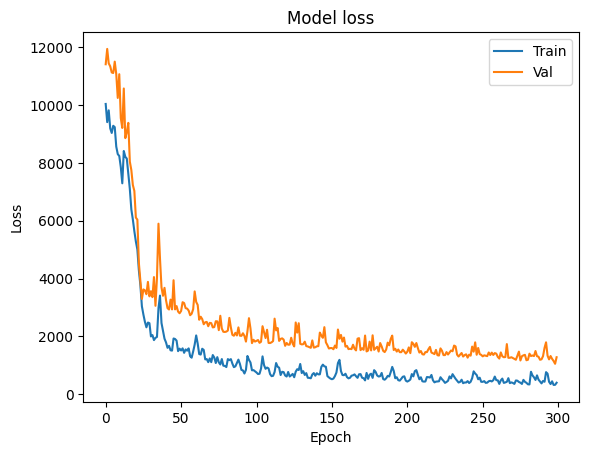

In [ ]:
import matplotlib.pyplot as plt

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

#### **Decision tree and Random Forest Regressor**  

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [ ]:
tree_model = DecisionTreeRegressor()
rf_model = RandomForestRegressor()

In [ ]:
tree_model.fit(X_train.values, Y_train.values)
rf_model.fit(X_train.values, Y_train.values)

RandomForestRegressor()

In [ ]:
from sklearn.metrics import mean_absolute_error

score_tree = mean_absolute_error(Y_test, tree_model.predict(X_test)) ##Calculating the mean absolute error Decision tree model

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(


In [ ]:
score_rf = mean_absolute_error(Y_test, rf_model.predict(X_test)) ##Calculating the mean absolute error Random Forest model

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


In [ ]:
score_nn = mean_absolute_error(Y_test, model.predict(X_test)) ##Calculating the mean absolute error Neural Network model

3/3 [==============================] - 0s 4ms/step


Printing the mean absolute error scores for the above trained models

In [ ]:
print(score_tree)
print(score_rf)
print(score_nn)

110.98710080895306
378.4929693378236
327.06138253183605


We can say that Decision Tree performed well in this case

**Save the model file**  

In [ ]:
import pickle

pickle.dump(tree_model, open('dt_model_btc.pkl', 'wb'))